**Loading the MNIST Data through Keras**

In [1]:
import keras
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()


Using TensorFlow backend.


**Preparing the image data**

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**Preparing the train labels ( coverting intergers to binary)**

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original,10)
test_labels = to_categorical(test_labels_original,10)

**Network Architecture**

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.7201 - acc: 0.8279 - val_loss: 0.4472 - val_acc: 0.8868
Epoch 2/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.4314 - acc: 0.8861 - val_loss: 0.3796 - val_acc: 0.9003
Epoch 3/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.3856 - acc: 0.8945 - val_loss: 0.3518 - val_acc: 0.9048
Epoch 4/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.3623 - acc: 0.9000 - val_loss: 0.3351 - val_acc: 0.9094
Epoch 5/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.3474 - acc: 0.9043 - val_loss: 0.3242 - val_acc: 0.9109
Epoch 6/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.3368 - acc: 0.9067 - val_loss: 0.3165 - val_acc: 0.9137
Epoch 7/

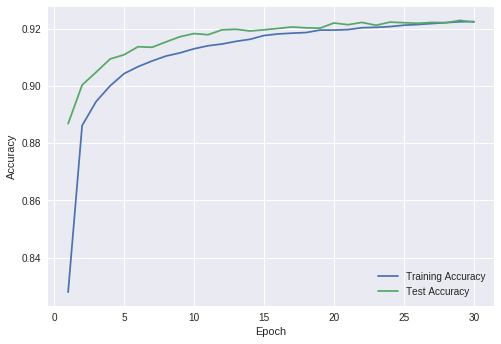

In [4]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax'))
#network.summary()
#learning_rate = 0.05

sgd = keras.optimizers.SGD(lr=0.05)
network.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 30
History = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

#evaluate function: Returns the loss value & metrics values for the model in test mode
metrics = network.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)


Compilation step

Training step